# Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [2]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

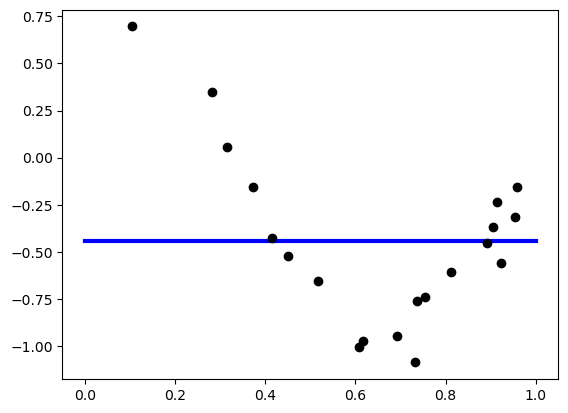

In [3]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


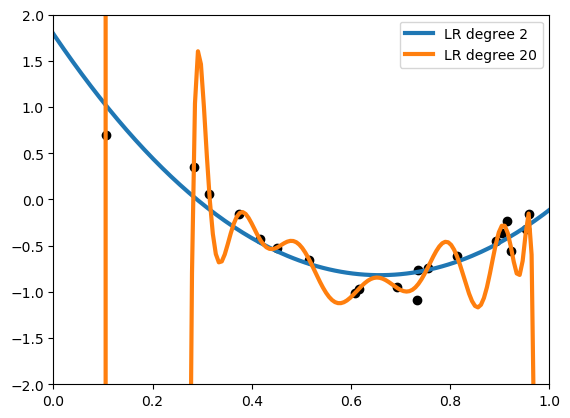

In [4]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (ElasticNet Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048707136867364276, tolerance: 0.00039565232858956715
  model = cd_fast.enet_coordinate_descent(


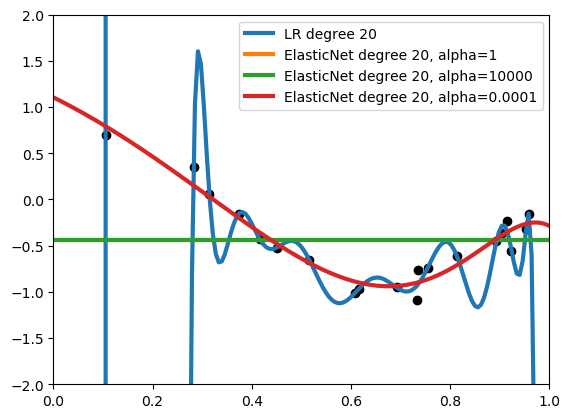

In [5]:
models = []
predicts = []
names = []
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))
models.append(('ElasticNet degree 20, alpha=1', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=1)) ))
models.append(('ElasticNet degree 20, alpha=10000', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=10000)) ))
models.append(('ElasticNet degree 20, alpha=0.0001', make_pipeline(PolynomialFeatures(20), ElasticNet(alpha=0.0001)) ))  

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [6]:
from sklearn.model_selection import GridSearchCV

seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_mean_absolute_error'
results = []


grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=3), ElasticNet()), param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7], 'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                    cv=kfold,
                    refit=False)
grid.fit(x, y)
grid.best_params_

c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


{'elasticnet__alpha': 0.001, 'polynomialfeatures__degree': 5}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [7]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=3), ElasticNet()), 
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7], 
                                'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                    cv=kfold,
                    refit=False)
grid.fit(X, y)
best_params = grid.best_params_
best_params

c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.673448421813248, tolerance: 0.4850155777777778
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.46389727739636, tolerance: 0.49490757777777783
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.460389066972756, tolerance: 0.4737236444444444
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_co

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 3}

In [10]:
from sklearn import  metrics

best_model = make_pipeline(PolynomialFeatures(degree=best_params['polynomialfeatures__degree']), ElasticNet(alpha=best_params['elasticnet__alpha']))
best_model.fit(X, y)
y_pred = best_model.predict(X)
r2 = metrics.r2_score(y, y_pred)
print(r2)

0.9910596362245003


c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.341018770541172, tolerance: 0.541714875
  model = cd_fast.enet_coordinate_descent(
